In [23]:
"""from mp_api.client import MPRester
import pandas as pd

# Option 1 (Recommended): Store your API key as an environment variable
# named 'MP_API_KEY' and MPRester will automatically use it.
# For example, in your terminal: export MP_API_KEY="API_KEY"

# Option 2: Pass your API key directly to the MPRester constructor
API_KEY = "4IeHY5jVcrgiKXNuAo6Jgs7yC0Z3hsli"

try:
    with MPRester(API_KEY) as mpr:
        # Search for materials with a band gap greater than 0.5 eV and check stability
        docs = mpr.materials.summary.search(
            band_gap=[0.5, None], # band_gap greater than or equal to 0.5 eV
            is_stable=True,       # material is stable (on the convex hull)
            fields=["material_id", "formula_pretty", "band_gap", "is_stable"] # request specific fields
        )

        print(f"Found {len(docs)} stable materials with a band gap >= 0.5 eV.\n")

        # Iterate through the results and print the data
        print("{:<15} {:<15} {:<15} {:<10}".format("Material ID", "Formula", "Band Gap (eV)", "Is Stable"))
        print("-" * 55)
        for doc in docs[:10]: # Print the first 10 results
            print("{:<15} {:<15} {:<15.3f} {:<10}".format(
                doc.material_id,
                doc.formula_pretty,
                doc.band_gap,
                doc.is_stable
            ))

except Exception as e:
    print(f"An error occurred: {e}")"""




Retrieving SummaryDoc documents:  20%|█▉        | 3000/15179 [11:09<45:17,  4.48it/s]  

Retrieving SummaryDoc documents: 100%|██████████| 15179/15179 [00:04<00:00, 3129.97it/s]

Found 15179 stable materials with a band gap >= 0.5 eV.

Material ID     Formula         Band Gap (eV)   Is Stable 
-------------------------------------------------------
mp-11107        Ac2O3           3.523           1         
mp-32800        Ac2S3           2.296           1         
mp-1183115      AcAlO3          4.102           1         
mp-27972        AcBr3           4.103           1         
mp-30274        AcBrO           4.241           1         
mp-27971        AcCl3           5.087           1         
mp-30273        AcClO           4.445           1         
mp-866101       AcCrO3          2.003           1         
mp-985278       AcF3            6.069           1         
mp-861502       AcFeO3          0.989           1         


In [1]:
from mp_api.client import MPRester
API_KEY = "4IeHY5jVcrgiKXNuAo6Jgs7yC0Z3hsli"
try:


    with MPRester(API_KEY) as mpr:
        # Query for Li-based cathode materials with high energy density
        docs = mpr.materials.insertion_electrodes.search(
            working_ion="Li",
            fields=[
                "battery_id", "formula_discharge", "average_voltage"
                , "energy_grav", "energy_vol", "capacity_grav", "capacity_vol", "stability_charge"
            ]
        )
        """
        battey_id = id for specific batteyr material system. (base material id + working ion being inserted)

        formulaDischarge = chem formula in fully discharged state

        avgVoltage = average voltage this material would produce during discharge cycle
                note: negative voltage would be good for anode, pos value good for cathode

        capacityGrav = mAh/g (milliamp-hours per gram), (amount of electrical charge stored per unit of mass.)

        energy_grav = energy amount stored per unit of weight
            energy density = Voltage x Capacity

        energy_vol (Volumetric Energy Density) = measures how much energy is stored per unit of space (volume)

        stability_charge((Electrochemical Stability) = measures the thermodynamic stability of the material when in fully charged state (with the Lithium removed).
            Research Insight: If this value were high (e.g., > 0.100) - relatively unstable for battery

        """

        # Convert to pandas for research analysis
        import pandas as pd
        df = pd.DataFrame([doc.dict() for doc in docs])
        print(df)

except Exception as e:
    print(f"An error occurred: {e}")


ModuleNotFoundError: No module named 'mp_api'

In [36]:
df.dropna()
stable = df[df["stability_charge"] < 0.100]
stable.head()

,battery_id,formula_discharge,average_voltage,capacity_grav,energy_grav,energy_vol,stability_charge,fields_not_requested
0,mp-28_Li,Li3Ce,-0.444846,499.595769,-222.242937,-576.149771,0.000000,"[builder_meta, battery_type, thermo_type, batt..."
2,mp-568806_Li,LiC6,0.084405,339.236925,28.633212,61.961259,0.011936,"[builder_meta, battery_type, thermo_type, batt..."
3,mp-573471_Li,Li22Sn5,-0.362516,26.936090,-9.764758,-25.225570,0.000000,"[builder_meta, battery_type, thermo_type, batt..."
4,mp-22902_Li,LiBi,0.796796,124.126099,98.903144,735.871648,0.049545,"[builder_meta, battery_type, thermo_type, batt..."
5,mp-124_Li,Li3Ag,0.210565,624.785871,131.558310,417.933696,0.003609,"[builder_meta, battery_type, thermo_type, batt..."


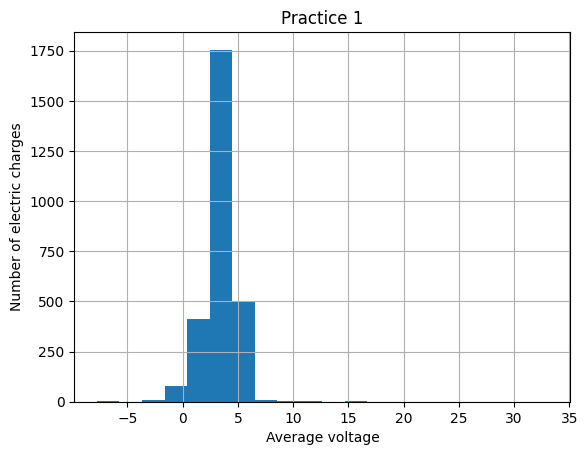

In [44]:
import matplotlib.pyplot as plt


df['average_voltage'].hist(bins=20)
plt.xlabel("Average voltage")
plt.ylabel("Number of electric charges")
plt.title("Practice 1")
plt.show()

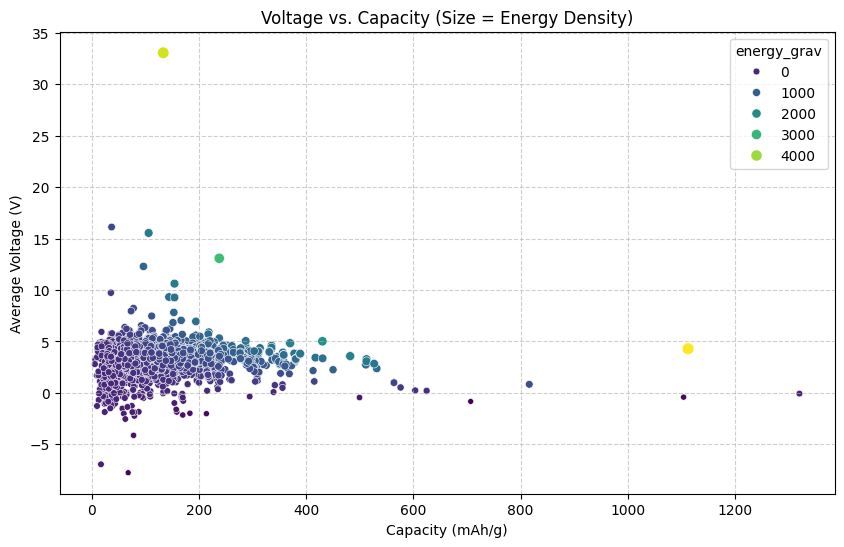

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='capacity_grav', y='average_voltage',
                hue='energy_grav', size='energy_grav', palette='viridis')
plt.title("Voltage vs. Capacity (Size = Energy Density)")
plt.xlabel("Capacity (mAh/g)")
plt.ylabel("Average Voltage (V)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

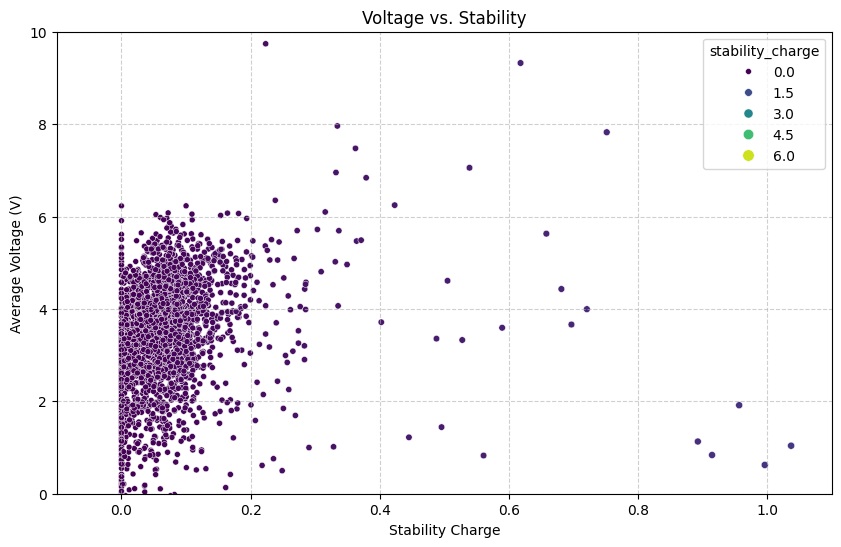

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='stability_charge', y='average_voltage',
                hue='stability_charge', size='stability_charge', palette='viridis')
plt.xlim(-0.1, 1.1)
plt.ylim(0,10)
plt.title("Voltage vs. Stability")
plt.xlabel("Stability Charge")
plt.ylabel("Average Voltage (V)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [70]:
# Select only the numeric columns relevant to battery performance
cols_to_analyze = ['average_voltage', 'capacity_grav', 'energy_grav', 'energy_vol',
                   'stability_charge']

# Calculate the Pearson correlation
correlation_matrix = df[cols_to_analyze].corr()

correlation_matrix.head()

,average_voltage,capacity_grav,energy_grav,energy_vol,stability_charge
average_voltage,1.000000,0.005447,0.559847,0.524516,0.104415
capacity_grav,0.005447,1.000000,0.682756,0.651335,0.013842
energy_grav,0.559847,0.682756,1.000000,0.935268,0.105365
energy_vol,0.524516,0.651335,0.935268,1.000000,0.100022
stability_charge,0.104415,0.013842,0.105365,0.100022,1.000000


In [71]:
# Example: Only analyze 'realistic' stable materials
df_clean = df[(df['stability_charge'] < 0.2) & (df['average_voltage'] > 0)]
correlation_clean = df_clean[cols_to_analyze].corr()


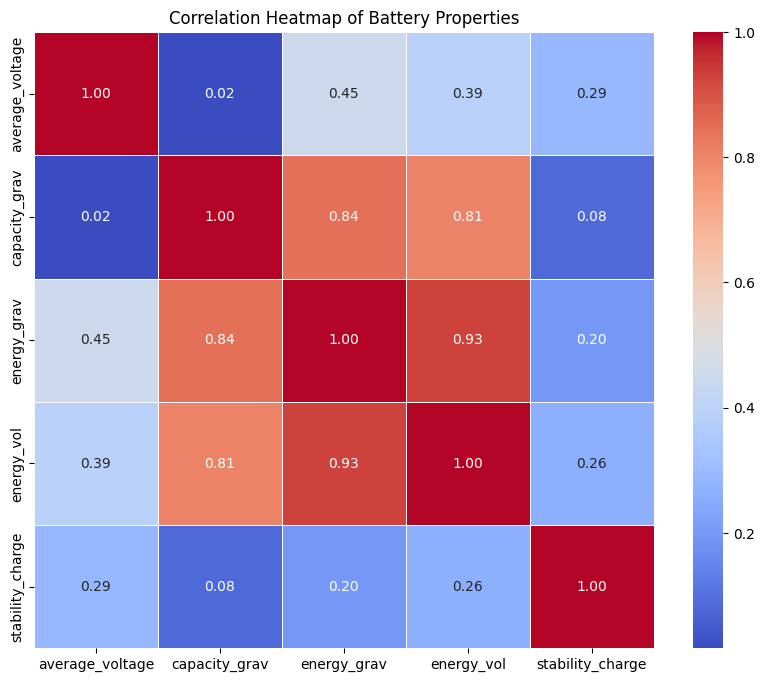

In [77]:
#- Compare correlation of energy density with capacity

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_clean, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Battery Properties")
plt.show()

In [79]:
# - Compare volumetric with gravimetric energy density

# INSIGHT - 0.93 correlation between gravimetric energy density and volumetric energy density

cols_to_analyze1 = ['energy_grav', 'energy_vol', 'capacity_grav', 'capacity_vol']

correlation1 = df_clean[cols_to_analyze1].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Battery Properties")
plt.show()



KeyError: "['capacity_vol'] not in index"

In [57]:
df.describe()

,average_voltage,capacity_grav,energy_grav,energy_vol,stability_charge
count,2774.000000,2774.000000,2774.000000,2774.000000,2774.000000
mean,3.418654,133.250389,456.258341,1568.226248,0.108745
std,1.532215,86.460912,323.570301,1082.347201,0.369295
min,-7.754751,5.962835,-583.545844,-1721.118698,0.000000
25%,2.793356,73.604721,241.082135,827.691570,0.026566
50%,3.537107,117.171086,419.225881,1420.127576,0.061368
75%,4.225228,169.890526,619.297903,2145.984629,0.091445
max,33.065771,1320.248328,4782.906878,13932.216223,6.485674


In [ ]:
"""
- Compare volumetric with gravimetric energy density
- Compare correlation of energy density with capacity
"""

In [41]:
#Use to display info on specific battery material id

with MPRester(API_KEY) as mpr:
    # Query for the specific battery_id
    # Note: Use mpr.materials.insertion_electrodes to avoid deprecation warnings
    docs = mpr.materials.insertion_electrodes.search(battery_ids="mp-568806_Li")

    if docs:
        # Convert the first (and only) matching document to a dictionary
        battery_data = docs[0].dict()

        # Method 1: Display as a readable DataFrame (Transposed for easier reading)
        df7 = pd.DataFrame([battery_data]).T
        df7.columns = ["Value"]
        print(df7)

        # Method 2: Print as a formatted JSON-like dictionary
        # import json
        # print(json.dumps(battery_data, indent=4, default=str))
    else:
        print("No battery data found for this ID.")

Retrieving InsertionElectrodeDoc documents: 100%|██████████| 1/1 [00:00<00:00, 19972.88it/s]

                                                                         Value
battery_type                                                         insertion
battery_id                                                        mp-568806_Li
thermo_type                                                               None
battery_formula                                                      Li0-0.17C
working_ion                                                                 Li
num_steps                                                                    2
max_voltage_step                                                       0.23618
last_updated                                  2025-09-19 09:44:17.405769+00:00
framework                                                           {'C': 1.0}
framework_formula                                                            C
elements                                                                   [C]
nelements                                           

In [67]:
for field in mpr.materials.insertion_electrodes.available_fields:
    print(field)


builder_meta
battery_type
battery_id
thermo_type
battery_formula
working_ion
num_steps
max_voltage_step
last_updated
framework
framework_formula
elements
nelements
chemsys
formula_anonymous
warnings
formula_charge
formula_discharge
max_delta_volume
average_voltage
capacity_grav
capacity_vol
energy_grav
energy_vol
fracA_charge
fracA_discharge
stability_charge
stability_discharge
id_charge
id_discharge
host_structure
adj_pairs
material_ids
entries_composition_summary
electrode_object
